# Project: European Soccer Database

Table of Contents:

. Introduction                                                                                                                                                                                                                   

. Data Wrangling


. Exploratory Data Analysis


. Conclusions

# Introduction



In this project we are going to analyze the soccer database from several European countries.

Soccer plays an important role in our world. It does not only entertain people, but also keeps to attract huge amount of money during games. Such games gather millions of people on stadiums and in front of TVs. Many fans bet on their favorite teams. Some of them win and a lot of them loose their money. 



The following questions will be explored during the analysis:

1)which teams scored more goals in home & away games?

2)Who are the top potential players rating during this period of time?

3)Do the best-performing players affect or improve their teams scoring goals ?

4)Is there a correlation between the player's skills and their overall rating performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
# Load  data and print out some lines:
df_country = pd.read_csv('Country.csv')
df_league=pd.read_csv('League.csv')
df_match=pd.read_csv('Match.csv')
df_player=pd.read_csv('Player.csv')
df_player_attributes=pd.read_csv('Player_Attributes.csv')
df_sqlite_sequence=pd.read_csv('sqlite_sequence.csv')
df_team= pd.read_csv('Team.csv')
df_team_attributes=pd.read_csv('Team_Attributes.csv')

In [3]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
df_sqlite_sequence.head()

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


In [9]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [10]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [11]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [12]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [13]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [14]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [15]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [16]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [17]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

##### Duplicate rows in each dataset

In [18]:
sum(df_country.duplicated())

0

In [19]:
sum(df_league.duplicated())

0

In [20]:
sum(df_match.duplicated())

0

In [21]:
sum(df_player.duplicated())

0

In [22]:
sum(df_player_attributes.duplicated())

0

In [23]:
sum(df_team.duplicated())

0

In [24]:
sum(df_team_attributes.duplicated())

0

##### Columns with missing values

In [25]:
df_country.columns[df_country.isnull().any()]

Index([], dtype='object')

In [26]:
df_league.columns[df_league.isnull().any()]

Index([], dtype='object')

In [27]:
df_match.columns[df_match.isnull().any()]

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=104)

In [28]:
df_player.columns[df_player.isnull().any()]

Index([], dtype='object')

In [29]:
df_player_attributes.columns[df_player_attributes.isnull().any()]

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [30]:
df_team.columns[df_team.isnull().any()]

Index(['team_fifa_api_id'], dtype='object')

In [31]:
df_team_attributes.columns[df_team_attributes.isnull().any()]

Index(['buildUpPlayDribbling'], dtype='object')

##### Number of leagues

In [32]:
df_match['league_id'].nunique()

11

##### Number of seasons

In [33]:
df_match['season'].nunique()

8

##### Number of players

In [34]:
df_player['player_name'].nunique()

10848

##### Number of teams

In [35]:
df_team['team_long_name'].nunique()

296

##### Which leagues recorded the highest number of matches within this timeframe?

In [36]:
df_league_match=pd.merge(df_league , df_match , on='country_id')
df_league_match.groupby('name')['league_id'].count().sort_values(ascending= False)

name
England Premier League      3040
France Ligue 1              3040
Spain LIGA BBVA             3040
Italy Serie A               3017
Germany 1. Bundesliga       2448
Netherlands Eredivisie      2448
Portugal Liga ZON Sagres    2052
Poland Ekstraklasa          1920
Scotland Premier League     1824
Belgium Jupiler League      1728
Switzerland Super League    1422
Name: league_id, dtype: int64

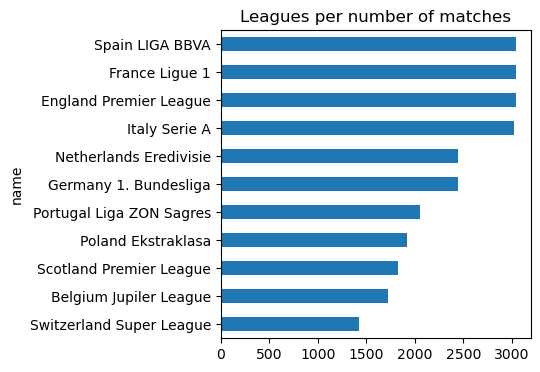

In [37]:
df_league_match.groupby('name')['league_id'].count(). sort_values(ascending= True).plot(kind='barh',title='Leagues per number of matches',figsize=(4,4));

from all the above we found:

-No duplicate rows

-No of columns with missing values

-No of matches played in each league during this period of time

-No of leagues: 11

-No of seasons: 8

-No of players:10848

-No of teams:296 

# Data Wrangling

In [38]:
# Preparing matches data for the analysis:

# Create new matches dataframe with informations of match, home team, and away team id's and goals:

df_match.drop(df_match.iloc[:,11:], axis=1, inplace=True)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [39]:
# Add the home and away team's names:

df_match['home_team_name'] = df_match['home_team_api_id'].apply(lambda x: df_team.query(f'team_api_id == {x}')['team_long_name'].values[0])
df_match['away_team_name'] = df_match['away_team_api_id'].apply(lambda x: df_team.query(f'team_api_id == {x}')['team_long_name'].values[0])

In [40]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,FCV Dender EH,Standard de Liège


In [41]:
# Rearrange the columns names with each team name next to his goals home or away: 

df_match = df_match[['id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_name','home_team_goal','away_team_goal','away_team_name']]
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_name,home_team_goal,away_team_goal,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,KRC Genk,1,1,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,SV Zulte-Waregem,0,0,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,KSV Cercle Brugge,0,3,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,KAA Gent,5,0,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,FCV Dender EH,1,3,Standard de Liège


In [42]:
# Set the match ID as index:

df_match.set_index('id')

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_name,home_team_goal,away_team_goal,away_team_name
id,,,,,,,,,,,,
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,KRC Genk,1,1,Beerschot AC
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,SV Zulte-Waregem,0,0,Sporting Lokeren
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,KSV Cercle Brugge,0,3,RSC Anderlecht
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,KAA Gent,5,0,RAEC Mons
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,FCV Dender EH,1,3,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...,...,...
25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,FC St. Gallen,1,0,FC Thun
25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,FC Vaduz,1,2,FC Luzern
25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,Grasshopper Club Zürich,2,0,FC Sion


In [44]:
# Preparing the players data for the analysis:

# Add the name of each player to the player's attributes dataframe:
df_player_attributes['player'] = df_player_attributes['player_api_id'].apply(lambda x: df_player.query(f'player_api_id == {x}')['player_name'].values[0])
df_player_attributes.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell


In [45]:
# Creating new dataframe with the chosen attributes for each player most important skills for the analysis:

df_player_att=df_player_attributes[['player','potential','finishing','heading_accuracy','dribbling','free_kick_accuracy','sprint_speed','stamina','penalties']]
df_player_att

,player,potential,finishing,heading_accuracy,dribbling,free_kick_accuracy,sprint_speed,stamina,penalties
0,Aaron Appindangoye,71.0,44.0,71.0,51.0,39.0,64.0,54.0,48.0
1,Aaron Appindangoye,71.0,44.0,71.0,51.0,39.0,64.0,54.0,48.0
2,Aaron Appindangoye,66.0,44.0,71.0,51.0,39.0,64.0,54.0,48.0
3,Aaron Appindangoye,65.0,43.0,70.0,50.0,38.0,64.0,54.0,47.0
4,Aaron Appindangoye,65.0,43.0,70.0,50.0,38.0,64.0,54.0,47.0
...,...,...,...,...,...,...,...,...,...
183973,Zvjezdan Misimovic,85.0,77.0,59.0,84.0,78.0,72.0,72.0,83.0
183974,Zvjezdan Misimovic,80.0,76.0,53.0,85.0,74.0,67.0,66.0,70.0
183975,Zvjezdan Misimovic,80.0,71.0,53.0,85.0,74.0,67.0,66.0,70.0
183976,Zvjezdan Misimovic,81.0,64.0,57.0,87.0,73.0,60.0,67.0,53.0


In [46]:
# Throughout the 8-season period, each player's skills were recorded multiple times.
# To assess each player's overall performance in each skill, we will calculate the mean of their recorded data.

# Group by 'player' and calculate the mean for each skill
player_skill_means = df_player_attributes.groupby('player', as_index=False).mean().round(2)

# Print the resulting DataFrame
player_skill_means

,player,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,3.0,218353.0,505942.0,63.60,67.60,48.60,43.60,70.60,60.60,...,53.60,47.60,63.80,66.00,67.80,5.60,10.60,9.60,7.60,7.60
1,Aaron Cresswell,22.0,189615.0,155782.0,66.97,74.48,70.79,49.45,52.94,62.27,...,57.45,53.12,69.39,68.79,71.52,12.18,8.67,14.24,10.36,12.91
2,Aaron Doran,51.5,186170.0,162549.0,67.00,74.19,68.12,57.92,58.69,65.12,...,69.38,60.54,22.04,21.12,21.35,14.04,11.81,17.73,10.12,13.50
3,Aaron Galindo,76.0,140161.0,30572.0,69.09,70.78,57.22,26.26,69.26,64.70,...,53.78,41.74,70.61,70.65,68.04,14.17,11.17,22.87,11.17,10.17
4,Aaron Hughes,100.0,17725.0,23780.0,73.24,74.68,45.08,38.84,73.04,64.76,...,46.48,52.96,77.60,76.04,74.60,8.28,8.32,24.92,12.84,11.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,183957.0,111191.0,36491.0,67.57,72.86,63.14,44.57,59.86,66.86,...,66.00,61.00,61.00,64.29,59.00,7.14,18.71,42.43,16.71,16.71
10844,Zurab Khizanishvili,183964.5,47058.0,35506.0,70.75,78.12,46.75,43.00,79.00,58.88,...,63.00,64.00,70.75,73.25,65.00,14.00,18.50,41.62,19.00,20.00
10845,Zvjezdan Misimovic,183973.5,102359.0,39902.0,80.00,81.70,78.20,72.60,57.40,85.50,...,87.10,70.90,26.20,31.20,30.00,9.00,15.40,42.10,16.20,12.00
10846,de Oliveira Cleber Monteiro,41622.0,163001.0,11833.0,66.11,67.56,53.11,56.56,63.00,66.44,...,66.22,53.11,62.78,65.33,66.67,11.11,17.00,38.44,15.22,16.56


# Exploratory Data Analysis

 # 1) which teams scored more goals in home & away games?

In [47]:
# create dataframe with most teams scored home goals :


result = {}
for name in df_match.home_team_name.unique():
    result[name] = 0


for score, home_team in zip(df_match.home_team_goal,df_match.home_team_name):
        result[ home_team ] += score
        
        result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse = True)}
        
        my_dict = result
top_home_team_scores= pd.DataFrame(list(my_dict.items()),columns = ['Home_team','Score_home'])
top_home_team_scores.head(10)

,Home_team,Score_home
0,Real Madrid CF,505
1,FC Barcelona,495
2,Celtic,389
3,FC Bayern Munich,382
4,PSV,370
5,Manchester City,365
6,Ajax,360
7,FC Basel,344
8,Manchester United,338
9,Chelsea,333


In [48]:
# create dataframe with most teams scored away goals :

result = {}
for name in df_match.away_team_name.unique():
    result[name] = 0


for score, away_team in zip(df_match.away_team_goal,df_match.away_team_name):
        result[ away_team ] += score
        
        result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse = True)}
        
        my_dict = result
top_away_team_scores= pd.DataFrame(list(my_dict.items()),columns = ['Away_team','Score_away'])
top_away_team_scores.head(10)

,Away_team,Score_away
0,FC Barcelona,354
1,Real Madrid CF,338
2,Celtic,306
3,Ajax,287
4,PSV,282
5,FC Basel,275
6,FC Bayern Munich,271
7,Arsenal,267
8,Borussia Dortmund,253
9,Chelsea,250


In [49]:
# create dataframe with most teams scored home & away goals during the time period:

home_away_goals=pd.merge(top_home_team_scores,top_away_team_scores, left_index=True, right_index=True)
home_away_goals.head(10)

,Home_team,Score_home,Away_team,Score_away
0,Real Madrid CF,505,FC Barcelona,354
1,FC Barcelona,495,Real Madrid CF,338
2,Celtic,389,Celtic,306
3,FC Bayern Munich,382,Ajax,287
4,PSV,370,PSV,282
5,Manchester City,365,FC Basel,275
6,Ajax,360,FC Bayern Munich,271
7,FC Basel,344,Arsenal,267
8,Manchester United,338,Borussia Dortmund,253
9,Chelsea,333,Chelsea,250


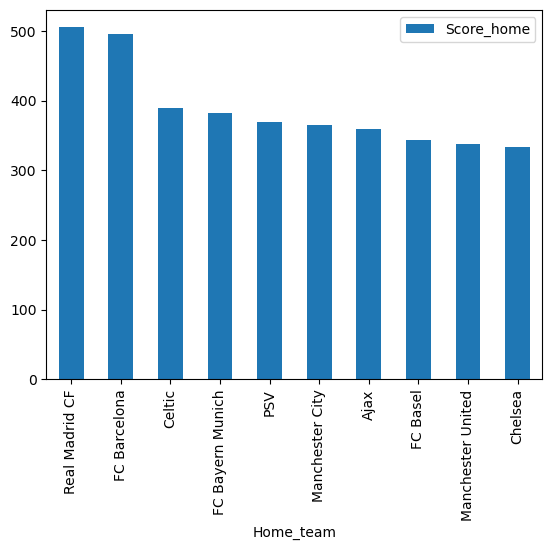

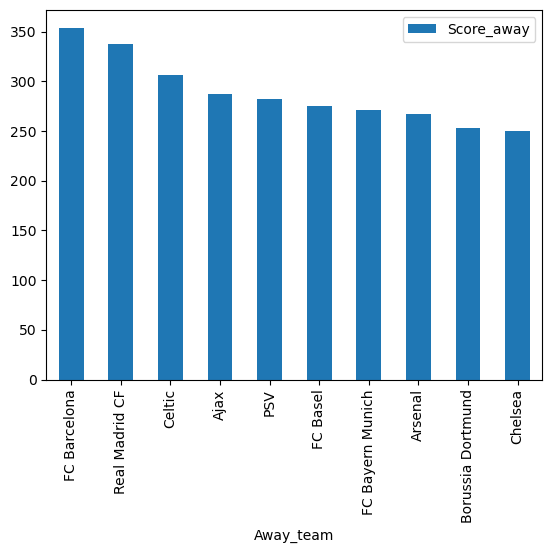

In [50]:
# show on graph the results :

home_away_goals.head(10).plot(x='Home_team' , y='Score_home', kind = 'bar');
home_away_goals.head(10).plot(x='Away_team' , y='Score_away', kind = 'bar');


 We can observe that the top 2 teams with most scored goals in both cases home or away goals are : Barcelona & Real Madrid 

# 2) Who are the top best-performing players during this period of time?

# 3) Do the best-performing players affect or improve their team's scoring goals?

In [51]:
# Exclude goalkeepers from the rest of the players :

# Create a list of goalkeeper skill columns
goalkeeper_skills = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Calculate the 75th percentile for each goalkeeper skill column
goalkeeper_thresholds = {skill: player_skill_means[skill].quantile(0.75) for skill in goalkeeper_skills}

# Combine the thresholds using the "or" operator
is_goalkeeper = player_skill_means[goalkeeper_skills].apply(lambda x: x > goalkeeper_thresholds[x.name]).all(axis=1)

# Filter the DataFrame to include only players without goalkeepers
is_player_df = player_skill_means[is_goalkeeper == False]

# Show the players without goalkeepers
is_player_df

,player,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,3.0,218353.0,505942.0,63.60,67.60,48.60,43.60,70.60,60.60,...,53.60,47.60,63.80,66.00,67.80,5.60,10.60,9.60,7.60,7.60
1,Aaron Cresswell,22.0,189615.0,155782.0,66.97,74.48,70.79,49.45,52.94,62.27,...,57.45,53.12,69.39,68.79,71.52,12.18,8.67,14.24,10.36,12.91
2,Aaron Doran,51.5,186170.0,162549.0,67.00,74.19,68.12,57.92,58.69,65.12,...,69.38,60.54,22.04,21.12,21.35,14.04,11.81,17.73,10.12,13.50
3,Aaron Galindo,76.0,140161.0,30572.0,69.09,70.78,57.22,26.26,69.26,64.70,...,53.78,41.74,70.61,70.65,68.04,14.17,11.17,22.87,11.17,10.17
4,Aaron Hughes,100.0,17725.0,23780.0,73.24,74.68,45.08,38.84,73.04,64.76,...,46.48,52.96,77.60,76.04,74.60,8.28,8.32,24.92,12.84,11.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,Zsolt Laczko,183945.5,164680.0,111182.0,65.69,71.62,67.25,46.75,60.31,63.12,...,44.69,51.88,63.25,65.25,63.88,9.00,8.00,5.00,5.00,8.00
10843,Zsolt Low,183957.0,111191.0,36491.0,67.57,72.86,63.14,44.57,59.86,66.86,...,66.00,61.00,61.00,64.29,59.00,7.14,18.71,42.43,16.71,16.71
10845,Zvjezdan Misimovic,183973.5,102359.0,39902.0,80.00,81.70,78.20,72.60,57.40,85.50,...,87.10,70.90,26.20,31.20,30.00,9.00,15.40,42.10,16.20,12.00
10846,de Oliveira Cleber Monteiro,41622.0,163001.0,11833.0,66.11,67.56,53.11,56.56,63.00,66.44,...,66.22,53.11,62.78,65.33,66.67,11.11,17.00,38.44,15.22,16.56


In [52]:
df_player_skills=is_player_df[['player','overall_rating','potential','finishing','heading_accuracy','dribbling','free_kick_accuracy',
                                   'vision','positioning','shot_power','ball_control','sprint_speed','stamina','penalties','player_api_id']]
df_player_skills

,player,overall_rating,potential,finishing,heading_accuracy,dribbling,free_kick_accuracy,vision,positioning,shot_power,ball_control,sprint_speed,stamina,penalties,player_api_id
0,Aaron Appindangoye,63.60,67.60,43.60,70.60,50.60,38.60,53.60,44.60,54.60,48.60,64.00,54.00,47.60,505942.0
1,Aaron Cresswell,66.97,74.48,49.45,52.94,61.09,62.12,57.45,51.48,65.91,61.79,74.94,72.88,53.12,155782.0
2,Aaron Doran,67.00,74.19,57.92,58.69,69.04,55.62,69.38,61.81,62.81,68.62,77.50,70.92,60.54,162549.0
3,Aaron Galindo,69.09,70.78,26.26,69.26,55.57,40.39,53.78,35.91,64.87,63.17,52.83,55.43,41.74,30572.0
4,Aaron Hughes,73.24,74.68,38.84,73.04,50.60,26.36,46.48,40.08,47.08,60.16,54.08,66.48,52.96,23780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,Zsolt Laczko,65.69,71.62,46.75,60.31,61.19,61.75,44.69,59.62,40.31,64.62,68.88,76.81,51.88,111182.0
10843,Zsolt Low,67.57,72.86,44.57,59.86,66.86,52.57,66.00,61.57,60.71,68.14,72.14,70.00,61.00,36491.0
10845,Zvjezdan Misimovic,80.00,81.70,72.60,57.40,83.00,74.20,87.10,76.20,75.80,85.20,65.70,63.00,70.90,39902.0
10846,de Oliveira Cleber Monteiro,66.11,67.56,56.56,63.00,55.56,49.11,66.22,62.00,62.78,66.33,61.67,70.11,53.11,11833.0


In [53]:
df_best_players =pd.merge(df_player ,df_player_skills  , on = 'player_api_id',how='inner')

df_best_players.groupby('player_name')['overall_rating'].max().sort_values(ascending =False).head(10).round(1)

player_name
Lionel Messi          92.2
Cristiano Ronaldo     91.3
Franck Ribery         88.5
Andres Iniesta        88.3
Zlatan Ibrahimovic    88.3
Arjen Robben          87.8
Xavi Hernandez        87.6
Wayne Rooney          87.2
Philipp Lahm          86.7
David Silva           86.5
Name: overall_rating, dtype: float64

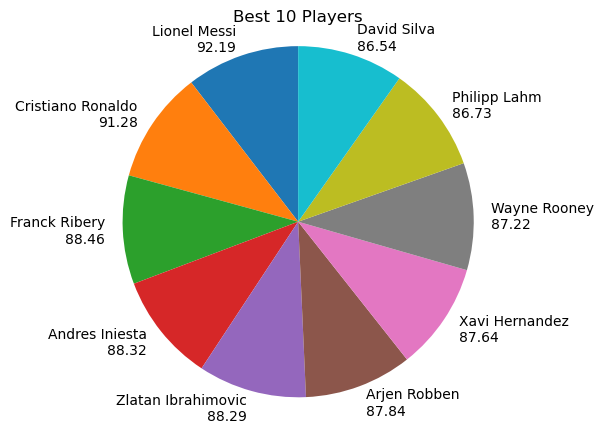

In [54]:
top_players = df_best_players.groupby('player_name')['overall_rating'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(5, 5))
plt.pie(top_players, labels=[f'{player}\n{rating}' for player, rating in zip(top_players.index, top_players.values)], autopct='', textprops={'color': 'black'}, startangle=90)
plt.title('Best 10 Players')
plt.axis('equal')  
plt.show()

-Based on the analysis, the following players stand out as the top performers:

Lionel Messi

Cristiano Ronaldo

Franck Ribery

Andres Iniesta

Zlatan Ibrahimovic

Arjen Robben

Xavi Hernandez

Wayne Rooney

Philipp Lahm

David Silva

-As we recognize here : Barcelona & Real Madrid have the big part of the pie from the best 10 players during the time period.

Barcelona : 4 players
Real Madrid : 2 players

-Observing the result, it becomes apparent that the presence of the top players significantly impacts their team's scoring ability. Barcelona and Real Madrid, housing the majority of the top 10 players, demonstrate a notable correlation between player performance and team success in goal-scoring. This suggests that the prowess of key players substantially contributes to their team's offensive capabilities.

# 4) Is there a correlation between the player's skills and their overall rating performance?

#### Relationship between  the heading accuracy skill and the overall rating of the player

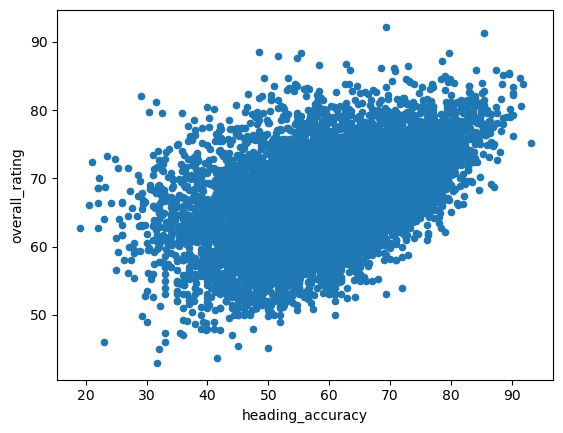

In [55]:
df_player_skills.plot(x='heading_accuracy', y='overall_rating', kind='scatter');

Positive correlation between the heading accuracy skill and the overall rating of the player

#### Relationship between  the finishing skill and the overall rating of the player

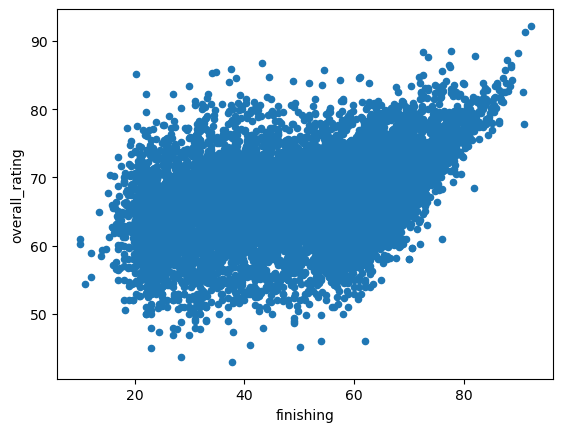

In [56]:
df_player_skills.plot(x='finishing', y='overall_rating', kind='scatter');

Positive correlation between the finishing skill and the overall rating of the player

#### Relationship between  the dribbling skill and the overall rating of the player

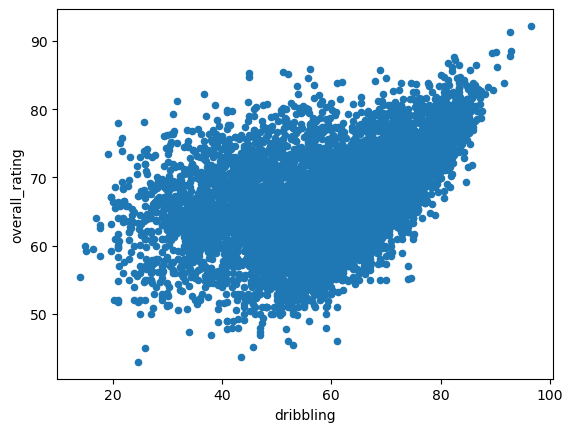

In [57]:
df_player_skills.plot(x='dribbling', y='overall_rating', kind='scatter');

Positive correlation between the dribbling skill and the overall rating of the player

#### Relationship between  the free kick accuracy skill and the overall rating of the player

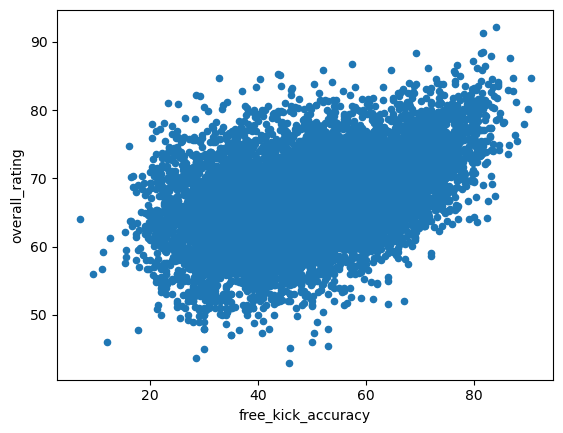

In [58]:
df_player_skills.plot(x='free_kick_accuracy', y='overall_rating', kind='scatter');

Positive correlation between the free kick accuracy skill and the overall rating of the player

#### Relationship between  the ball control skill and the overall rating of the player

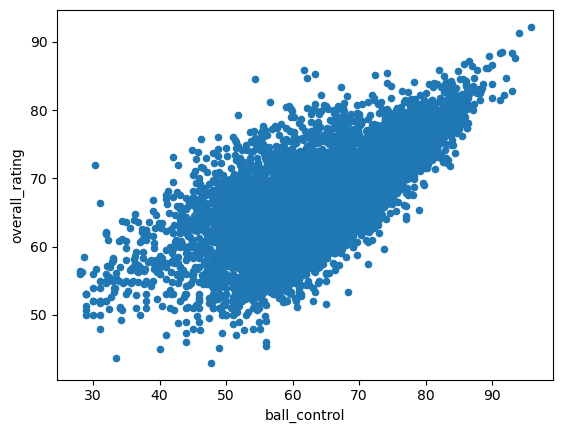

In [59]:
df_player_skills.plot(x='ball_control', y='overall_rating', kind='scatter');

Strong positive correlation between the ball control skill and the overall rating of the player

#### Relationship between  the vision skill and the overall rating of the player

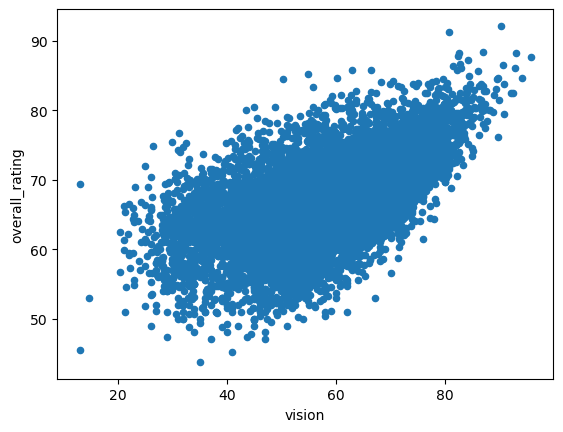

In [60]:
df_player_skills.plot(x='vision', y='overall_rating', kind='scatter');

Strong positive correlation between the vision skill and the overall rating of the player

#### The correlation between player's individual skills and their overall rating can provide valuable insights into the factors influencing a player's performance. Understanding which skills contribute most significantly to the overall rating can help in player scouting, team formation, and strategic decision-making. Therefore, investigating this correlation aligns with the broader goal of understanding player performance and its impact on team success, making it relevant to your project objectives.






# Conclusion


 -We can observe that a detailed data analysis has been performed. The answers to four stated questions were obtained.
 
 -Firstly, we identified Real Madrid CF and FC Barcelona as the top two teams in scoring goals, both at home and away, with Real Madrid CF leading in home games (505 goals) and FC Barcelona in away games (354 goals), closely followed by FC Barcelona in home games (495 goals) and Real Madrid CF in away games (338 goals).


 -Then we examined the presence of the best-performing players within the dataset to explore their potential impact on the goal-scoring dominance of these two teams. Remarkably, six out of the top ten players were found to have affiliations with either FC Barcelona (4 players) or Real Madrid (2 players), suggesting a significant influence of these players on their respective team's goal-scoring performance.

 -Finally , we delved into the relationship between player skills and the ratings of the best performing players to uncover any correlations. All correlations between the meticulously identified player skills and the overall rating of the player were positive, indicating that higher player skill performance directly impacts player ratings, subsequently influencing team scoring.

-This analysis sheds light on the complex interplay between player skills, best-performing players, and team performance, providing valuable insights into the factors contributing to player's overall performance.

# limitation

-During the analysis of this project I found some limitations.

-The name of the players were incomplete.

-Also I could not  link the players to the teams as there was no correlation between them.

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295